CASE STUDY 1
##Problem Statement:

###Business Context:
In the rapidly evolving landscape of e-commerce, customer reviews play a pivotal role in shaping the perception of products and influencing purchasing decisions. All businesses recognize the significance of understanding customer sentiment and extracting valuable insights from the vast pool of customer reviews to drive decisions. The inability to actively track customer feedback can result in significant challenges for businesses.

Negative sentiments expressed by customers become crucial to track and resolve as they can lead to several detrimental effects, including:

1. Customer Churn: Unaddressed negative sentiment can lead to customer dissatisfaction and the potential loss of loyal customers. This may result in customers opting for alternative platforms for their future purchases, impacting long-term revenue and market share.

2. Reputation Damage: The persistence of negative sentiment, if not effectively managed, can tarnish the reputation of the business. Potential customers may be dissuaded from making purchases on the platform due to concerns raised in negative reviews, affecting brand loyalty and trust.

3. Financial Implications: Negative sentiment can lead to a decline in sales, impacting profitability. Discouraged by negative feedback, potential customers may choose competitors, resulting in direct financial repercussions for the company.



### Problem Definition:
A rising e-commerce platform in the space of electronic gadgets captures customer feedback through different channels, such as product review forms, surveys, and more. In addition, they also capture customer feedback from social media platforms. After witnessing a 200% growth in their customer base in the last three years, they are now experiencing a substantial upswing in the number of customer feedbacks received, with a noteworthy increase of ~25% over the past six months.

As they were previously monitoring customer feedback manually, this surge in customer feedback presents a multifaceted challenge for the business as the volume of reviews has surpassed the manual capacity to track and analyze effectively. Recognizing the need for a proactive and scalable solution, the organization seeks to employ artificial intelligence (AI) to aid them. The primary objective is to develop an AI solution that can automatically assess and categorize customer sentiments as negative, positive, or neutral by parsing and analyzing product reviews. As a Data Scientist, you are provided with the reviews shared by customers regarding their experience with the product along with the manually labeled sentiments of the reviews and asked to analyze the data and build a predictive model that can parse the customer reviews and predict the sentiment of the customer.

### Data Dictionary:
- **Product ID**: An exclusive identification number for each product

- **Product Review**: Insights and opinions shared by customers about the product

- **Sentiment**: Sentiment associated with the product review, indicating whether the review expresses a positive, negative, or neutral sentiment








In [3]:
# requirements

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import warnings
# warnings.filterwarnings('ignore')
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

In [4]:
df = pd.read_csv('Product_Reviews.csv')

##Problem Statement:

###Business Context:
In the rapidly evolving landscape of e-commerce, customer reviews play a pivotal role in shaping the perception of products and influencing purchasing decisions. All businesses recognize the significance of understanding customer sentiment and extracting valuable insights from the vast pool of customer reviews to drive decisions. The inability to actively track customer feedback can result in significant challenges for businesses.

Negative sentiments expressed by customers become crucial to track and resolve as they can lead to several detrimental effects, including:

1. Customer Churn: Unaddressed negative sentiment can lead to customer dissatisfaction and the potential loss of loyal customers. This may result in customers opting for alternative platforms for their future purchases, impacting long-term revenue and market share.

2. Reputation Damage: The persistence of negative sentiment, if not effectively managed, can tarnish the reputation of the business. Potential customers may be dissuaded from making purchases on the platform due to concerns raised in negative reviews, affecting brand loyalty and trust.

3. Financial Implications: Negative sentiment can lead to a decline in sales, impacting profitability. Discouraged by negative feedback, potential customers may choose competitors, resulting in direct financial repercussions for the company.



### Problem Definition:
A rising e-commerce platform in the space of electronic gadgets captures customer feedback through different channels, such as product review forms, surveys, and more. In addition, they also capture customer feedback from social media platforms. After witnessing a 200% growth in their customer base in the last three years, they are now experiencing a substantial upswing in the number of customer feedbacks received, with a noteworthy increase of ~25% over the past six months.

As they were previously monitoring customer feedback manually, this surge in customer feedback presents a multifaceted challenge for the business as the volume of reviews has surpassed the manual capacity to track and analyze effectively. Recognizing the need for a proactive and scalable solution, the organization seeks to employ artificial intelligence (AI) to aid them. The primary objective is to develop an AI solution that can automatically assess and categorize customer sentiments as negative, positive, or neutral by parsing and analyzing product reviews. As a Data Scientist, you are provided with the reviews shared by customers regarding their experience with the product along with the manually labeled sentiments of the reviews and asked to analyze the data and build a predictive model that can parse the customer reviews and predict the sentiment of the customer.

### Data Dictionary:
- **Product ID**: An exclusive identification number for each product

- **Product Review**: Insights and opinions shared by customers about the product

- **Sentiment**: Sentiment associated with the product review, indicating whether the review expresses a positive, negative, or neutral sentiment






In [5]:
df

,Product ID,Product Review,Sentiment
0,AVpe7AsMilAPnD_xQ78G,I initially had trouble deciding between the p...,POSITIVE
1,AVpe7AsMilAPnD_xQ78G,Allow me to preface this with a little history...,POSITIVE
2,AVpe7AsMilAPnD_xQ78G,I am enjoying it so far. Great for reading. Ha...,POSITIVE
3,AVpe7AsMilAPnD_xQ78G,I bought one of the first Paperwhites and have...,POSITIVE
4,AVpe7AsMilAPnD_xQ78G,I have to say upfront - I don't like coroporat...,POSITIVE
...,...,...,...
1002,AVpfo9ukilAPnD_xfhuj,This is not the same remote that I got for my ...,NEUTRAL
1003,AVpfo9ukilAPnD_xfhuj,I have had to change the batteries in this rem...,NEGATIVE
1004,AVpfo9ukilAPnD_xfhuj,"Remote did not activate, nor did it connect to...",NEGATIVE
1005,AVpfo9ukilAPnD_xfhuj,It does the job but is super over priced. I fe...,NEUTRAL


In [6]:
df.shape

(1007, 3)

##EDA

In [7]:
df.count()

,0
Product ID,1007
Product Review,1007
Sentiment,1007


In [8]:
df.isnull().sum()

,0
Product ID,0
Product Review,0
Sentiment,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Product ID      1007 non-null   object
 1   Product Review  1007 non-null   object
 2   Sentiment       1007 non-null   object
dtypes: object(3)
memory usage: 23.7+ KB


In [10]:
df.describe()

,Product ID,Product Review,Sentiment
count,1007,1007,1007
unique,66,908,3
top,AVpfpK8KLJeJML43BCuD,I'm a huge fan of the Echo family. I have two ...,POSITIVE
freq,542,6,852


In [11]:
df.duplicated().sum()

np.int64(2)

In [12]:
df[df.duplicated()]

,Product ID,Product Review,Sentiment
191,AVpfLiCSilAPnD_xWpk_,Read more,POSITIVE
391,AVpe7LD5LJeJML43ybWA,Read more,POSITIVE


In [13]:

df.drop(df[df.duplicated()].index, inplace=True)


In [14]:
df['Sentiment'].unique()

array(['POSITIVE', 'NEUTRAL', 'NEGATIVE'], dtype=object)

In [15]:
df['Sentiment'].value_counts()

,count
Sentiment,
POSITIVE,850
NEUTRAL,81
NEGATIVE,74


In [16]:
import seaborn as sns

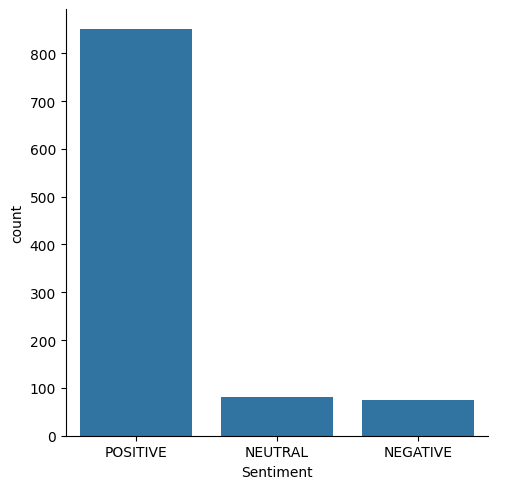

In [17]:
sns.catplot(x='Sentiment', data=df, kind='count')

### Key Insights from Initial EDA

1. The dataset is clean (no missing values).

2. Duplicate reviews existed but were removed for reliability.

3. Sentiment labels are categorical with three unique values.

4. Positive sentiment dominates, while negative and neutral sentiments are underrepresented.

This reflects a general trend in customer feedback, where satisfied customers are more likely to leave positive reviews, but it also poses challenges for predictive modeling due to class imbalance.

## Preprocessing

## **Text Preprocessing Steps**

1. **Special Character Removal**

   * Removed punctuation, symbols, and other non-alphanumeric characters using **Regex (`re.sub`)**.
   * Ensures the text contains only meaningful words, numbers, and spaces.

2. **Lowercasing**

   * Converted all reviews to **lowercase**.
   * Helps avoid treating the same word differently (e.g., *"Good"* vs *"good"*).

3. **Stopword Removal**

   * Used **NLTK stopwords** to remove common words like *“is, the, and”*.
   * These words don’t add much meaning for sentiment classification.

4. **Whitespace Removal**

   * Removed unnecessary whitespaces from text.
   * Keeps the cleaned text compact and standardized.

5. **Tokenization**

   * Split sentences into individual words (tokens).
   * Needed for applying stemming/lemmatization.

6. **Stemming & Lemmatization**

   * **Stemming (PorterStemmer):** Reduces words to their root by chopping suffixes (*“studies” → “studi”*).
   * **Lemmatization (WordNetLemmatizer):** Converts words to their dictionary base form (*“studies” → “study”*).
   * **Choice:** Lemmatization is preferred for accuracy, while Stemming is faster.




Step 1: Remove special characters

In [18]:
import re

def remove_special_chars(text):
    # Keep only letters and spaces
    return re.sub(r'[^a-zA-Z\s]', '', text)

df['cleaned_text'] = df['Product Review'].apply(remove_special_chars)
print(df[['Product Review', 'cleaned_text']].head(10))


                                      Product Review  \
0  I initially had trouble deciding between the p...   
1  Allow me to preface this with a little history...   
2  I am enjoying it so far. Great for reading. Ha...   
3  I bought one of the first Paperwhites and have...   
4  I have to say upfront - I don't like coroporat...   
5  Had older model, that you could text to speech...   
6  This is a review of the Kindle Paperwhite laun...   
7  I love my kindle! I got one for my fiance on h...   
8  Vraiment bon petit appareil , lger et facile d...   
9  Exactly what it is supposed to be. Works great...   

                                        cleaned_text  
0  I initially had trouble deciding between the p...  
1  Allow me to preface this with a little history...  
2  I am enjoying it so far Great for reading Had ...  
3  I bought one of the first Paperwhites and have...  
4  I have to say upfront  I dont like coroporate ...  
5  Had older model that you could text to speech ... 

Step 2: Convert text to lowercase

In [19]:
def to_lower(text):
    return text.lower()

df['cleaned_text'] = df['cleaned_text'].apply(to_lower)
print(df[['Product Review', 'cleaned_text']].head(10))


                                      Product Review  \
0  I initially had trouble deciding between the p...   
1  Allow me to preface this with a little history...   
2  I am enjoying it so far. Great for reading. Ha...   
3  I bought one of the first Paperwhites and have...   
4  I have to say upfront - I don't like coroporat...   
5  Had older model, that you could text to speech...   
6  This is a review of the Kindle Paperwhite laun...   
7  I love my kindle! I got one for my fiance on h...   
8  Vraiment bon petit appareil , lger et facile d...   
9  Exactly what it is supposed to be. Works great...   

                                        cleaned_text  
0  i initially had trouble deciding between the p...  
1  allow me to preface this with a little history...  
2  i am enjoying it so far great for reading had ...  
3  i bought one of the first paperwhites and have...  
4  i have to say upfront  i dont like coroporate ...  
5  had older model that you could text to speech ... 

Step 3: Remove stopwords

In [20]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download stopwords & tokenizer (only once)
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    tokens = word_tokenize(text)  # split into words
    filtered_tokens = [word for word in tokens if word not in stop_words]
    return " ".join(filtered_tokens)

df['cleaned_text'] = df['cleaned_text'].apply(remove_stopwords)
print(df[['Product Review', 'cleaned_text']].head(10))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


                                      Product Review  \
0  I initially had trouble deciding between the p...   
1  Allow me to preface this with a little history...   
2  I am enjoying it so far. Great for reading. Ha...   
3  I bought one of the first Paperwhites and have...   
4  I have to say upfront - I don't like coroporat...   
5  Had older model, that you could text to speech...   
6  This is a review of the Kindle Paperwhite laun...   
7  I love my kindle! I got one for my fiance on h...   
8  Vraiment bon petit appareil , lger et facile d...   
9  Exactly what it is supposed to be. Works great...   

                                        cleaned_text  
0  initially trouble deciding paperwhite voyage r...  
1  allow preface little history casual reader own...  
2  enjoying far great reading original fire since...  
3  bought one first paperwhites pleased constant ...  
4  say upfront dont like coroporate hermetically ...  
5  older model could text speech one hasnt liked ... 

Step 4: Lemmatization - This step reduces words to their dictionary base form




In [21]:
from nltk.stem import WordNetLemmatizer
import nltk

# Download WordNet (only once)
nltk.download('wordnet')
nltk.download('omw-1.4')

lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    tokens = word_tokenize(text)
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return " ".join(lemmatized_tokens)

df['cleaned_text'] = df['cleaned_text'].apply(lemmatize_text)
print(df[['Product Review', 'cleaned_text']].head(10))


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


                                      Product Review  \
0  I initially had trouble deciding between the p...   
1  Allow me to preface this with a little history...   
2  I am enjoying it so far. Great for reading. Ha...   
3  I bought one of the first Paperwhites and have...   
4  I have to say upfront - I don't like coroporat...   
5  Had older model, that you could text to speech...   
6  This is a review of the Kindle Paperwhite laun...   
7  I love my kindle! I got one for my fiance on h...   
8  Vraiment bon petit appareil , lger et facile d...   
9  Exactly what it is supposed to be. Works great...   

                                        cleaned_text  
0  initially trouble deciding paperwhite voyage r...  
1  allow preface little history casual reader own...  
2  enjoying far great reading original fire since...  
3  bought one first paperwhites pleased constant ...  
4  say upfront dont like coroporate hermetically ...  
5  older model could text speech one hasnt liked ... 

In [22]:
df

,Product ID,Product Review,Sentiment,cleaned_text
0,AVpe7AsMilAPnD_xQ78G,I initially had trouble deciding between the p...,POSITIVE,initially trouble deciding paperwhite voyage r...
1,AVpe7AsMilAPnD_xQ78G,Allow me to preface this with a little history...,POSITIVE,allow preface little history casual reader own...
2,AVpe7AsMilAPnD_xQ78G,I am enjoying it so far. Great for reading. Ha...,POSITIVE,enjoying far great reading original fire since...
3,AVpe7AsMilAPnD_xQ78G,I bought one of the first Paperwhites and have...,POSITIVE,bought one first paperwhites pleased constant ...
4,AVpe7AsMilAPnD_xQ78G,I have to say upfront - I don't like coroporat...,POSITIVE,say upfront dont like coroporate hermetically ...
...,...,...,...,...
1002,AVpfo9ukilAPnD_xfhuj,This is not the same remote that I got for my ...,NEUTRAL,remote got alexaecho doesnt control volume thi...
1003,AVpfo9ukilAPnD_xfhuj,I have had to change the batteries in this rem...,NEGATIVE,change battery remote twice per month since pu...
1004,AVpfo9ukilAPnD_xfhuj,"Remote did not activate, nor did it connect to...",NEGATIVE,remote activate connect boxa poorly designed r...
1005,AVpfo9ukilAPnD_xfhuj,It does the job but is super over priced. I fe...,NEUTRAL,job super priced feel like offer replacement r...


## Feature Extraction

**Feature Extraction (Vectorization)**

   * Transformed cleaned text into numerical features for ML models:

     * **Bag of Words (BoW):** Represents text as word counts.
     * **TF-IDF:** Captures importance of words relative to the whole corpus.
     * **N-grams:** Captures word sequences (bigrams/trigrams).



In [23]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, roc_auc_score
import pandas as pd

BAG OF WORDS

In [24]:
bow_vectorizer = CountVectorizer(max_features=5000)
X_bow = bow_vectorizer.fit_transform(df['cleaned_text'])
df_bow = pd.DataFrame(X_bow.toarray(), columns=bow_vectorizer.get_feature_names_out())

df_bow.head()

,aa,abc,abilitieswhen,ability,abit,able,aboutconclusionif,abovementioned,absolute,absolutely,...,youthe,youtube,youtubes,youve,yr,zen,zero,zink,zippy,zoom
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf_vectorizer.fit_transform(df['cleaned_text'])
df_tfidf = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

df_tfidf.head()

,aa,abc,abilitieswhen,ability,abit,able,aboutconclusionif,abovementioned,absolute,absolutely,...,youthe,youtube,youtubes,youve,yr,zen,zero,zink,zippy,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
ngram_vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(2,3))
X_ngrams = ngram_vectorizer.fit_transform(df['cleaned_text'])
df_ngrams = pd.DataFrame(X_ngrams.toarray(), columns=ngram_vectorizer.get_feature_names_out())

df_ngrams.head()

,aa battery,aa battery duracell,ability download,ability download prime,ability watch,ability watch content,able afford,able download,able hear,able see,...,youre traveling,youre watching,youre watching video,youre welcomelong,youre welcomelong reviewi,youtube hdx,youtube hdx blue,youtube video,youtube video taking,yr old
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Training and Evaluation

When output is form of categories we apply classification ML algorithm

Evaluation of classification model:
- Accuracy
- Recall
- Precision
- F1-score
- ROC-AUC Curve
Evaluation Classification Algorithm

confusion matrix:-


```
actual ▶      yes        no
pred ⬇
yes            tp         fp
no             fn         tn
```

-  Accuracy: tp+tf / tp+fp+tn+fn
-  precision : tp / tp + fp
-  recall : tp / tp + fn
-  f1-score : 2pr / p+r (harmonic mean of precision and recall)

In [27]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [28]:
# Target variable
y = df['Sentiment']


def evaluate_model(X, y, model_name):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)

    print(f"\n---- {model_name} ----")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred, average='weighted'))
    print("Recall:", recall_score(y_test, y_pred, average='weighted'))
    print("F1-Score:", f1_score(y_test, y_pred, average='weighted'))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

evaluate_model(X_bow, y, "Bag of Words (BoW)")
evaluate_model(X_tfidf, y, "TF-IDF")
evaluate_model(X_ngrams, y, "N-Grams (Bigrams + Trigrams)")



---- Bag of Words (BoW) ----
Accuracy: 0.845771144278607
Precision: 0.831563945418755
Recall: 0.845771144278607
F1-Score: 0.8118485888362268

Classification Report:
               precision    recall  f1-score   support

    NEGATIVE       0.29      0.13      0.18        15
     NEUTRAL       1.00      0.19      0.32        16
    POSITIVE       0.86      0.97      0.91       170

    accuracy                           0.85       201
   macro avg       0.72      0.43      0.47       201
weighted avg       0.83      0.85      0.81       201


---- TF-IDF ----
Accuracy: 0.845771144278607
Precision: 0.8219781919418452
Recall: 0.845771144278607
F1-Score: 0.806142911656016

Classification Report:
               precision    recall  f1-score   support

    NEGATIVE       0.20      0.07      0.10        15
     NEUTRAL       1.00      0.19      0.32        16
    POSITIVE       0.86      0.98      0.91       170

    accuracy                           0.85       201
   macro avg       0.69  